In [1]:
import keras

Using TensorFlow backend.


In [2]:
import mnist_reader

X_train, y_train = mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

9
0
0
3
0
2
7
2
5
5


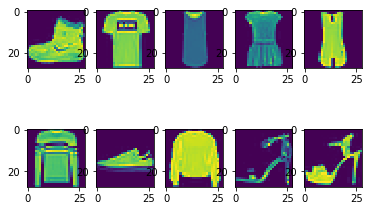

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap=None)
    print(y_train[i])
    
plt.show()

In [6]:
num_classes = 10
# floatに変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 0-1に正規化
X_train /= 255
X_test /= 255
# クラス数をセット
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger

model = Sequential()
 
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [11]:
#訓練データの1個のデータ数
batch_size = 128
# 誤差逆伝播法の繰り返しの回数
epochs = 20

model.compile(loss="categorical_crossentropy",
             optimizer=RMSprop(),
             metrics=['accuracy'])
 
es = EarlyStopping(monitor='val_loss',patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(X_train,y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_split=0.1,
                callbacks=[es,csv_logger])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 70us/step - loss: 0.9378 - acc: 0.6537 - val_loss: 0.6110 - val_acc: 0.7802
Epoch 2/20
54000/54000 [==============================] - 2s 33us/step - loss: 0.5879 - acc: 0.7804 - val_loss: 0.5594 - val_acc: 0.7897
Epoch 3/20
54000/54000 [==============================] - 2s 34us/step - loss: 0.5061 - acc: 0.8159 - val_loss: 0.4802 - val_acc: 0.8220
Epoch 4/20
54000/54000 [==============================] - 2s 33us/step - loss: 0.4607 - acc: 0.8318 - val_loss: 0.4349 - val_acc: 0.8377
Epoch 5/20
54000/54000 [==============================] - 2s 34us/step - loss: 0.4288 - acc: 0.8439 - val_loss: 0.4071 - val_acc: 0.8500
Epoch 6/20
54000/54000 [==============================] - 2s 33us/step - loss: 0.4054 - acc: 0.8530 - val_loss: 0.3884 - val_acc: 0.8560
Epoch 7/20
54000/54000 [==============================] - 2s 34us/step - loss: 0.3886 - acc: 0.8570 - val_loss: 0.3755 - val_acc:

In [12]:
score = model.evaluate(X_test,y_test,verbose=0)
print('test loss:',score[0])
print('test acc:',score[1])

test loss: 0.35610517823696136
test acc: 0.8704


<function matplotlib.pyplot.show(*args, **kw)>

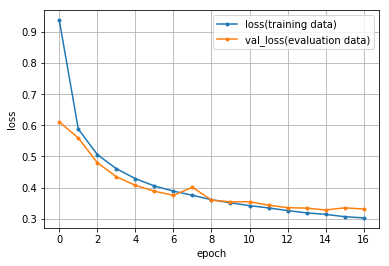

In [13]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
 
epochs = len(loss)
 
plt.plot(range(epochs),loss,marker='.',label='loss(training data)')
plt.plot(range(epochs),val_loss,marker='.', label='val_loss(evaluation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show